In [1]:
#!pip install --upgrade tensorflow==2.14
#!pip install tensorflow-privacy

In [2]:
#pip list

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from pymongo import MongoClient
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb
import shap
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, f1_score
import numpy as np
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from diffprivlib.models import GaussianNB
from diffprivlib.mechanisms import Laplace
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
#from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasSGDOptimizer

#from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
from tensorflow_privacy import DPKerasSGDOptimizer
from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy
tf.executing_eagerly()
tf.compat.v1.enable_eager_execution()

In [3]:
tf.executing_eagerly()

True

In [4]:
#!pip install tensorflow[and-cuda]
# Verify the installation:
tf.compat.v1.disable_v2_behavior()
tf.get_logger().setLevel('ERROR')

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
print(tf.config.list_physical_devices('CPU'))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [6]:
# Setup MongoDB connection
client = MongoClient('localhost', 49153)  # Connect to the MongoDB server
print("Connection established.")


Connection established.


In [7]:
db = client['user_database']  # Use (or create) a database named "user_database"
collection = db['user_sessions']  # Use (or create) a collection named "valid_users"
print("Collection recieved.")


Collection recieved.


In [8]:
data = collection.find({})
print("data....")


data....


In [9]:
# Convert the cursor to a list and then DataFrame
data_list = list(data)
df = pd.DataFrame(data_list)


In [10]:
df.head()

,_id,sessionId,sessionTimestamp,userId,userName,email,gender,state,ipAddress,sessionDuration,...,isViewedProduct1,isViewedProduct2,isViewedProduct3,isViewedProduct4,isViewedProduct5,isViewedProduct6,isViewedProduct7,isViewedProduct8,isViewedProduct9,isViewedProduct10
0,66296b8ec1b7c419709a01de,dc6219d3-05b8-4dc4-ab22-acc611a756ff,2024-04-17T13:29:01,16ba298f-9976-4425-aac5-1d7e8633df2c,Heather Griffith,brendathomas@example.net,Male,New Jersey,214.138.234.232,132,...,1,1,1,1,1,1,1,1,1,1
1,66296b8ec1b7c419709a01df,da9013a9-b73b-431c-818b-2dcea2f74d22,2024-04-23T21:12:16,16ba298f-9976-4425-aac5-1d7e8633df2c,Heather Griffith,brendathomas@example.net,Male,Maine,109.187.122.14,215,...,0,1,1,1,1,1,1,1,0,0
2,66296b8fc1b7c419709a01e0,a39eab9e-8c2b-4388-9ce1-c1ed6b3f8711,2024-04-23T14:27:16,f4ec4ce9-579a-49f9-8faf-2f19cb15e273,Michael Soto,ashley16@example.com,Male,Arizona,215.122.13.192,146,...,1,1,1,1,1,1,1,1,1,1
3,66296b8fc1b7c419709a01e1,a7a9ecf7-296a-4cdf-aa9a-15fe0d19567f,2024-04-17T13:29:01,f4ec4ce9-579a-49f9-8faf-2f19cb15e273,Michael Soto,ashley16@example.com,Male,Alaska,101.232.201.53,342,...,0,0,0,0,1,1,1,1,0,0
4,66296b8fc1b7c419709a01e2,3797dbac-aada-49de-af3f-13f2bbd13a29,2024-04-19T08:17:24,f4ec4ce9-579a-49f9-8faf-2f19cb15e273,Michael Soto,ashley16@example.com,Male,Oklahoma,180.179.114.86,528,...,1,0,0,0,0,0,0,0,1,1


In [11]:
df.columns

Index(['_id', 'sessionId', 'sessionTimestamp', 'userId', 'userName', 'email',
       'gender', 'state', 'ipAddress', 'sessionDuration', 'clicks', 'exitPage',
       'referrer', 'deviceType', 'paymentMethodType', 'amountSpent', 'action',
       'purchaseMade', 'isViewedProduct1', 'isViewedProduct2',
       'isViewedProduct3', 'isViewedProduct4', 'isViewedProduct5',
       'isViewedProduct6', 'isViewedProduct7', 'isViewedProduct8',
       'isViewedProduct9', 'isViewedProduct10'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4665 entries, 0 to 4664
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   _id                4665 non-null   object
 1   sessionId          4665 non-null   object
 2   sessionTimestamp   4665 non-null   object
 3   userId             4665 non-null   object
 4   userName           4665 non-null   object
 5   email              4665 non-null   object
 6   gender             4665 non-null   object
 7   state              4665 non-null   object
 8   ipAddress          4665 non-null   object
 9   sessionDuration    4665 non-null   int64 
 10  clicks             4665 non-null   int64 
 11  exitPage           4665 non-null   object
 12  referrer           4665 non-null   object
 13  deviceType         4665 non-null   object
 14  paymentMethodType  4665 non-null   object
 15  amountSpent        4665 non-null   int64 
 16  action             4665 non-null   object


In [13]:
df.state.value_counts()[:2]

state
Louisiana    129
Vermont      121
Name: count, dtype: int64

In [14]:
df.deviceType.value_counts()

deviceType
desktop    1607
tablet     1539
mobile     1517
unknown       2
Name: count, dtype: int64

In [15]:
df.action.value_counts()

action
checkout       2345
add_to_cart     811
view_item       765
search          744
Name: count, dtype: int64

In [16]:
df.referrer.value_counts()

referrer
Facebook       1026
Instagram       962
Google          917
Direct          901
WorldMarket     854
unknown           5
Name: count, dtype: int64

In [17]:
df.exitPage.value_counts()

exitPage
coffee table     502
bedside table    496
sofa             483
office chair     477
dining table     469
dining chairs    469
dresser          469
office desk      445
bed              438
accent chair     417
Name: count, dtype: int64

In [18]:
df.paymentMethodType.value_counts()

paymentMethodType
None          2320
CreditCard    1204
PayPal        1141
Name: count, dtype: int64

In [19]:
df.purchaseMade.value_counts()

purchaseMade
True     2345
False    2320
Name: count, dtype: int64

In [20]:
# Assuming 'df' is your dataframe
df = df[df.duplicated(subset='sessionId', keep='first')]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1629 entries, 712 to 2545
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   _id                1629 non-null   object
 1   sessionId          1629 non-null   object
 2   sessionTimestamp   1629 non-null   object
 3   userId             1629 non-null   object
 4   userName           1629 non-null   object
 5   email              1629 non-null   object
 6   gender             1629 non-null   object
 7   state              1629 non-null   object
 8   ipAddress          1629 non-null   object
 9   sessionDuration    1629 non-null   int64 
 10  clicks             1629 non-null   int64 
 11  exitPage           1629 non-null   object
 12  referrer           1629 non-null   object
 13  deviceType         1629 non-null   object
 14  paymentMethodType  1629 non-null   object
 15  amountSpent        1629 non-null   int64 
 16  action             1629 non-null   object
 17

In [21]:
# 2. Convert Data Types
df['action'] = df['action'].astype('category')  # Convert text data to categorical
df['paymentMethodType'] = df['paymentMethodType'].astype('category')
df['exitPage'] = df['exitPage'].astype('category')
df['referrer'] = df['referrer'].astype('category')

In [22]:
df['gender'] = df['gender'].astype('category')
df['state'] = df['state'].astype('category')
df['deviceType'] = df['deviceType'].astype('category')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1629 entries, 712 to 2545
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   _id                1629 non-null   object  
 1   sessionId          1629 non-null   object  
 2   sessionTimestamp   1629 non-null   object  
 3   userId             1629 non-null   object  
 4   userName           1629 non-null   object  
 5   email              1629 non-null   object  
 6   gender             1629 non-null   category
 7   state              1629 non-null   category
 8   ipAddress          1629 non-null   object  
 9   sessionDuration    1629 non-null   int64   
 10  clicks             1629 non-null   int64   
 11  exitPage           1629 non-null   category
 12  referrer           1629 non-null   category
 13  deviceType         1629 non-null   category
 14  paymentMethodType  1629 non-null   category
 15  amountSpent        1629 non-null   int64   
 16  action   

In [24]:
df.describe()

,sessionDuration,clicks,amountSpent,isViewedProduct1,isViewedProduct2,isViewedProduct3,isViewedProduct4,isViewedProduct5,isViewedProduct6,isViewedProduct7,isViewedProduct8,isViewedProduct9,isViewedProduct10
count,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000
mean,309.364641,26.012277,5778.826274,0.662370,0.655617,0.645181,0.637201,0.653775,0.664211,0.622468,0.627379,0.624923,0.634745
std,172.071230,14.619577,6543.177011,0.473047,0.475313,0.478605,0.480955,0.475912,0.472411,0.484919,0.483651,0.484291,0.481649
min,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,167.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,310.000000,27.000000,2699.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,456.000000,39.000000,11380.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,599.000000,50.000000,17829.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


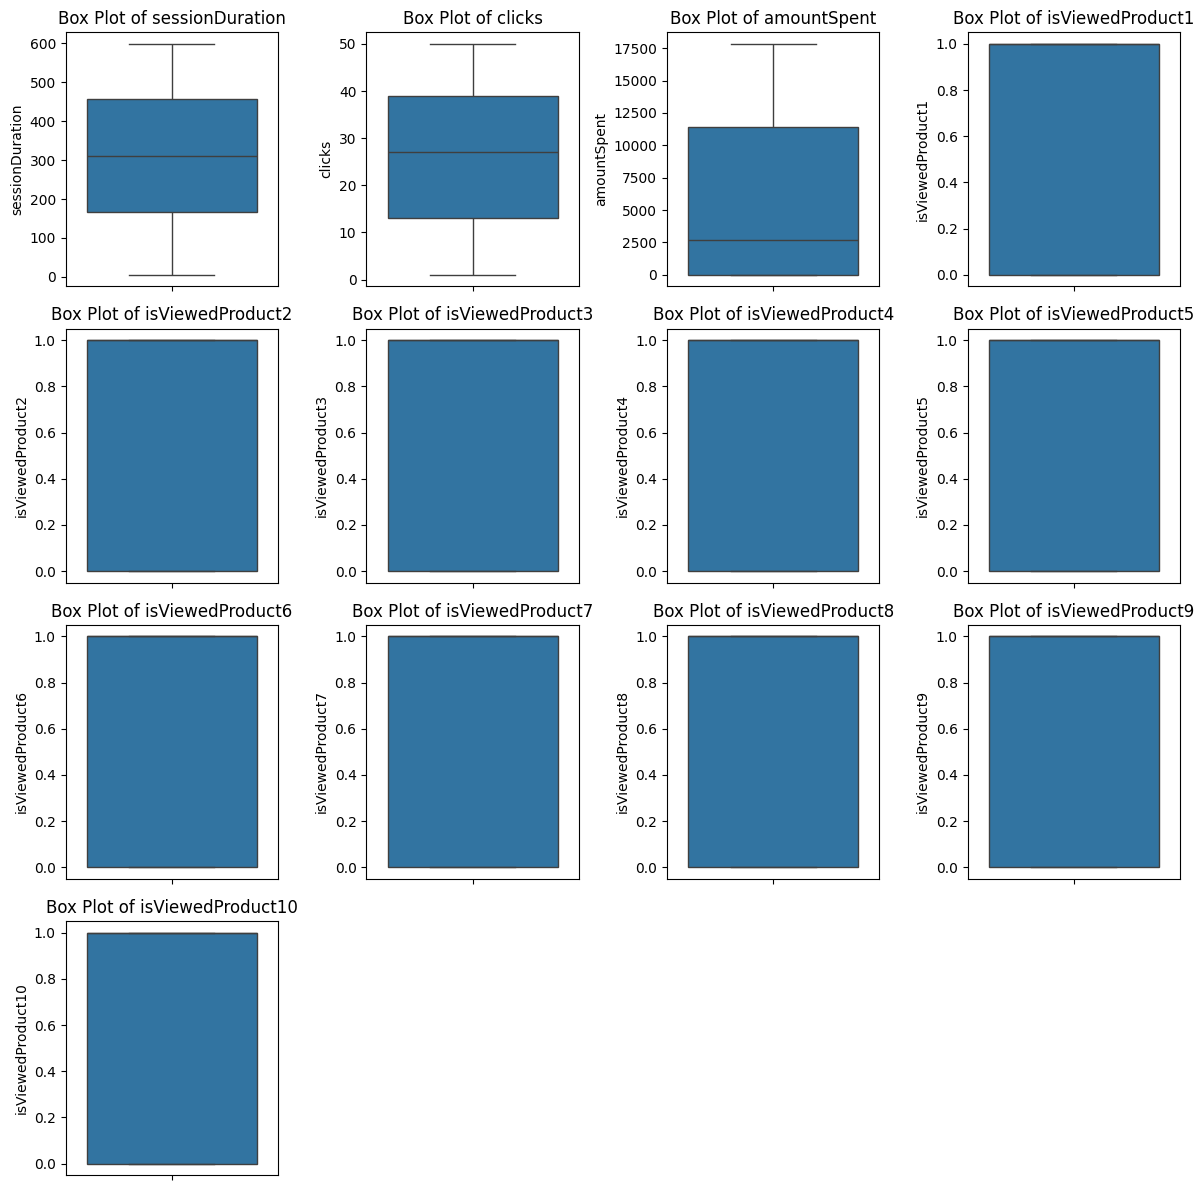

In [25]:
plt.figure(figsize=(12, 12))  # Bigger figure size to accommodate four subplots
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
grid_rows, grid_cols = 4, 4  # Grid of two rows and two columns

for index, column in enumerate(numeric_columns):
    plt.subplot(grid_rows, grid_cols, index + 1)  # Subplot for each numeric column
    sns.boxplot(data=df[column])
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area

plt.show()

In [26]:
df.head()

,_id,sessionId,sessionTimestamp,userId,userName,email,gender,state,ipAddress,sessionDuration,...,isViewedProduct1,isViewedProduct2,isViewedProduct3,isViewedProduct4,isViewedProduct5,isViewedProduct6,isViewedProduct7,isViewedProduct8,isViewedProduct9,isViewedProduct10
712,662989c9e9cc984dc182106a,dc6219d3-05b8-4dc4-ab22-acc611a756ff,2024-04-17T13:29:01,16ba298f-9976-4425-aac5-1d7e8633df2c,Heather Griffith,brendathomas@example.net,Male,New Jersey,214.138.234.232,132,...,1,1,1,1,1,1,1,1,1,1
713,662989c9e9cc984dc182106b,da9013a9-b73b-431c-818b-2dcea2f74d22,2024-04-23T21:12:16,16ba298f-9976-4425-aac5-1d7e8633df2c,Heather Griffith,brendathomas@example.net,Male,Maine,109.187.122.14,215,...,0,1,1,1,1,1,1,1,0,0
714,662989c9e9cc984dc182106c,a39eab9e-8c2b-4388-9ce1-c1ed6b3f8711,2024-04-23T14:27:16,f4ec4ce9-579a-49f9-8faf-2f19cb15e273,Michael Soto,ashley16@example.com,Male,Arizona,215.122.13.192,146,...,1,1,1,1,1,1,1,1,1,1
715,662989c9e9cc984dc182106d,a7a9ecf7-296a-4cdf-aa9a-15fe0d19567f,2024-04-17T13:29:01,f4ec4ce9-579a-49f9-8faf-2f19cb15e273,Michael Soto,ashley16@example.com,Male,Alaska,101.232.201.53,342,...,0,0,0,0,1,1,1,1,0,0
716,662989c9e9cc984dc182106e,3797dbac-aada-49de-af3f-13f2bbd13a29,2024-04-19T08:17:24,f4ec4ce9-579a-49f9-8faf-2f19cb15e273,Michael Soto,ashley16@example.com,Male,Oklahoma,180.179.114.86,528,...,1,0,0,0,0,0,0,0,1,1


## Random Forest

In [29]:
df.columns

Index(['_id', 'sessionId', 'sessionTimestamp', 'userId', 'userName', 'email',
       'gender', 'state', 'ipAddress', 'sessionDuration', 'clicks', 'exitPage',
       'referrer', 'deviceType', 'paymentMethodType', 'amountSpent', 'action',
       'purchaseMade', 'isViewedProduct1', 'isViewedProduct2',
       'isViewedProduct3', 'isViewedProduct4', 'isViewedProduct5',
       'isViewedProduct6', 'isViewedProduct7', 'isViewedProduct8',
       'isViewedProduct9', 'isViewedProduct10'],
      dtype='object')

In [30]:
df.head(1)

,_id,sessionId,sessionTimestamp,userId,userName,email,gender,state,ipAddress,sessionDuration,...,isViewedProduct1,isViewedProduct2,isViewedProduct3,isViewedProduct4,isViewedProduct5,isViewedProduct6,isViewedProduct7,isViewedProduct8,isViewedProduct9,isViewedProduct10
712,662989c9e9cc984dc182106a,dc6219d3-05b8-4dc4-ab22-acc611a756ff,2024-04-17T13:29:01,16ba298f-9976-4425-aac5-1d7e8633df2c,Heather Griffith,brendathomas@example.net,Male,New Jersey,214.138.234.232,132,...,1,1,1,1,1,1,1,1,1,1


## Feature Engineering

In [27]:
# Convert sessionTimestamp to datetime
df['sessionTimestamp'] = pd.to_datetime(df['sessionTimestamp'])

# Extract parts of the timestamp into separate columns
df['hour_of_day'] = df['sessionTimestamp'].dt.hour
df['day_of_week'] = df['sessionTimestamp'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df['month'] = df['sessionTimestamp'].dt.month
df['week_of_year'] = df['sessionTimestamp'].dt.isocalendar().week

# You can further bin the hour_of_day to part_of_day
def map_hour_to_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['part_of_day'] = df['hour_of_day'].apply(map_hour_to_part_of_day)

In [32]:
df.head(1)

,_id,sessionId,sessionTimestamp,userId,userName,email,gender,state,ipAddress,sessionDuration,...,isViewedProduct7,isViewedProduct8,isViewedProduct9,isViewedProduct10,hour_of_day,day_of_week,is_weekend,month,week_of_year,part_of_day
712,662989c9e9cc984dc182106a,dc6219d3-05b8-4dc4-ab22-acc611a756ff,2024-04-17 13:29:01,16ba298f-9976-4425-aac5-1d7e8633df2c,Heather Griffith,brendathomas@example.net,Male,New Jersey,214.138.234.232,132,...,1,1,1,1,13,Wednesday,0,4,16,Afternoon


In [40]:
df_lsh = df.copy()

In [29]:
df_lsh.columns

Index(['_id', 'sessionId', 'sessionTimestamp', 'userId', 'userName', 'email',
       'gender', 'state', 'ipAddress', 'sessionDuration', 'clicks', 'exitPage',
       'referrer', 'deviceType', 'paymentMethodType', 'amountSpent', 'action',
       'purchaseMade', 'isViewedProduct1', 'isViewedProduct2',
       'isViewedProduct3', 'isViewedProduct4', 'isViewedProduct5',
       'isViewedProduct6', 'isViewedProduct7', 'isViewedProduct8',
       'isViewedProduct9', 'isViewedProduct10', 'hour_of_day', 'day_of_week',
       'is_weekend', 'month', 'week_of_year', 'part_of_day'],
      dtype='object')

In [30]:
df_lsh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1629 entries, 712 to 2545
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _id                1629 non-null   object        
 1   sessionId          1629 non-null   object        
 2   sessionTimestamp   1629 non-null   datetime64[ns]
 3   userId             1629 non-null   object        
 4   userName           1629 non-null   object        
 5   email              1629 non-null   object        
 6   gender             1629 non-null   category      
 7   state              1629 non-null   category      
 8   ipAddress          1629 non-null   object        
 9   sessionDuration    1629 non-null   int64         
 10  clicks             1629 non-null   int64         
 11  exitPage           1629 non-null   category      
 12  referrer           1629 non-null   category      
 13  deviceType         1629 non-null   category      
 14  paymentMeth

In [41]:
# Let's select some features for the model
features = ['hour_of_day', 'day_of_week', 'is_weekend', 'month', 'week_of_year', 'part_of_day',
            'gender', 'state', 'sessionDuration', 'clicks', 'exitPage', 'referrer',
            'deviceType', 'isViewedProduct1', 'isViewedProduct2',
            'isViewedProduct3', 'isViewedProduct4', 'isViewedProduct5',
            'isViewedProduct6', 'isViewedProduct7', 'isViewedProduct8',
            'isViewedProduct9', 'isViewedProduct10']
target = 'purchaseMade'

## Locality Sensitive Hashing

In [42]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Create a LabelEncoder and MinMaxScaler instance
encoder = LabelEncoder()
scaler = MinMaxScaler()

# Define the categorical variables that need to be encoded
categorical_vars = [
    'action', 'paymentMethodType', 'gender', 'state',
    'exitPage', 'referrer', 'deviceType', 'day_of_week', 'part_of_day'
]

# Encode categorical variables using the LabelEncoder
for var in categorical_vars:
    df_lsh[var] = encoder.fit_transform(df_lsh[var])

# Define the numerical variables that need to be normalized
numerical_vars = ['sessionDuration', 'clicks', 'amountSpent']

# Normalize numerical variables using the MinMaxScaler
df_lsh[numerical_vars] = scaler.fit_transform(df_lsh[numerical_vars])

# Convert binary 'isViewedProductX' to int type
product_view_vars = [f'isViewedProduct{i}' for i in range(1, 11)]
df_lsh[product_view_vars] = df_lsh[product_view_vars].astype(int)

# Remove columns that should not be included in the LSH feature set
columns_to_exclude = ['_id', 'sessionTimestamp', 'email', 'ipAddress']
df_lsh = df_lsh.drop(columns=columns_to_exclude)

In [33]:
df_lsh.head(1)

,sessionId,userId,userName,gender,state,sessionDuration,clicks,exitPage,referrer,deviceType,...,isViewedProduct7,isViewedProduct8,isViewedProduct9,isViewedProduct10,hour_of_day,day_of_week,is_weekend,month,week_of_year,part_of_day
712,dc6219d3-05b8-4dc4-ab22-acc611a756ff,16ba298f-9976-4425-aac5-1d7e8633df2c,Heather Griffith,1,29,0.213805,0.897959,1,4,1,...,1,1,1,1,13,6,0,4,16,0


In [43]:
# First, create a mapping from userId to userName
user_id_to_name = df_lsh.set_index('userId')['userName'].to_dict()

In [44]:
from itertools import islice

# Print any 5 elements from the dictionary using itertools.islice
for key, value in islice(user_id_to_name.items(), 5):
    print(key, value)


16ba298f-9976-4425-aac5-1d7e8633df2c Heather Griffith
f4ec4ce9-579a-49f9-8faf-2f19cb15e273 Michael Soto
5d9fcdf0-e78b-482e-a062-4a49ed2a8903 Christopher Stone
063ad177-60bc-498f-a45b-628cbe4d4a30 Cindy Brown
7d628aca-330d-4e69-b89a-3bd06aa6af76 Hannah Wagner


In [45]:
from datasketch import MinHash, MinHashLSH

In [ ]:
#### The threshold setting of 0.5 means that two items will be considered similar 
#### (i.e., will be candidates for being in the same "bucket" in the LSH parlance) 
#### if their MinHash signatures have a Jaccard similarity of 0.5 or higher.

#### This is the number of permutation functions used in MinHash, 
#### which directly affects the accuracy and the storage of the MinHash signatures. 
#### Here, 500 permutations are used to generate the MinHash signature for each user.

In [46]:
# Setup LSH
lsh = MinHashLSH(threshold=0.5, num_perm=500)  
minhashes = {}

# Iterate through each row in DataFrame to create MinHash objects
for index, row in df_lsh.iterrows():
    m = MinHash(num_perm=500)  # Make sure this matches the num_perm used in LSH setup
        
    for feature in df_lsh.columns:
        if feature not in ['sessionId','userId','userName']: # Using all for MinHash (excluding 'userId','username' and 'sessionId')
            value = row[feature]
            #print("value :", value)
            # Ensure that only the non-null values are used to update the MinHash
            if pd.notnull(value):
                m.update(str(value).encode('utf-8'))
                #print("m minhash update :", m)
    # Use 'userId' as a reference key
    user_id = row['userId']
    
    # If this user has already had a session processed, merge MinHashes
    if user_id in minhashes:
        # Merge the current MinHash with the existing MinHash for the user
        minhashes[user_id].merge(m)
        #print("m minhash merge:", minhashes)
    else:
        # If this is the first session for the user, add it directly
        minhashes[user_id] = m
        #print("m minhash first session:", minhashes)
        
# Insert the aggregated MinHash signatures into LSH
for user_id, minhash in minhashes.items():
    lsh.insert(user_id, minhash)
    #print("lsh :", lsh)

In [47]:
# Function to find similar users
def find_similar_users(user_id, lsh):
    if user_id in minhashes:
        similar_user_ids = lsh.query(minhashes[user_id])
        return [uid for uid in similar_user_ids if uid != user_id]  # Exclude the query user ID from the results
    else:
        return []  # User ID not found



In [57]:
#similar_users

[]

In [48]:
# Function to find similar users for all users
def find_similar_users_for_all(lsh, user_id_to_name):
    all_similar_users = {}
    for user_id in user_id_to_name.keys():
        similar_user_ids = find_similar_users(user_id, lsh)
        similar_users_with_names = [(uid, user_id_to_name.get(uid, "Name not found")) for uid in similar_user_ids]
        all_similar_users[user_id] = similar_users_with_names
    return all_similar_users

# Run the function to find similar users for all
all_similar_users_with_names = find_similar_users_for_all(lsh, user_id_to_name)

# Now you can print or process all_similar_users_with_names as needed
# For example, print similar users for the first 10 users in the list
for user_id, similar_users in list(all_similar_users_with_names.items())[:10]:
    print(f"User {user_id_to_name.get(user_id)} has similar users: {similar_users}")

User Heather Griffith has similar users: [('1b3a27bf-1293-4519-a42a-489205e049d6', 'Gary Massey'), ('93539f36-fe3f-4164-a997-5d30945a1409', 'Johnny Moore'), ('65903353-9097-421a-b64b-10f1fdb8b4ca', 'Rebecca Thompson'), ('36e8b693-cf48-44a0-bdaf-12f09152e57f', 'Casey Hines'), ('8ce91ecb-8108-4e85-9975-926a704d1b93', 'Amanda Hernandez'), ('277e678c-46db-4e98-a4a6-05a9cfa5a7e2', 'Megan Rogers'), ('3767b9db-766b-49d0-84c4-905808de23b9', 'Todd Holt'), ('955c2ae6-0672-4794-9a4e-35d04a830d69', 'Samuel Wood MD'), ('46e40f89-dfe4-4fec-ac5a-8f65452e32a0', 'Jesus Carter'), ('59a48ae2-e88a-4a3c-8200-f748be7426a9', 'Danielle Cross'), ('5c49023f-6959-4a4a-8f51-1fc0277a7d1b', 'Bianca Nelson')]
User Michael Soto has similar users: [('3413426d-b3f0-490f-912f-3d5ff885f844', 'Allison Turner'), ('46e40f89-dfe4-4fec-ac5a-8f65452e32a0', 'Jesus Carter'), ('58910942-c0dd-4773-9b2d-cded4b296bde', 'Amy Burns')]
User Christopher Stone has similar users: [('6f5c2a61-5139-46e1-ab00-8bc3feb775b0', 'Lisa Jackson'), 

In [100]:
df_rf = df.drop(columns=['_id', 'sessionId','userId','userName','email','ipAddress'])
df_rf.head(1)

,sessionTimestamp,gender,state,sessionDuration,clicks,exitPage,referrer,deviceType,paymentMethodType,amountSpent,...,isViewedProduct7,isViewedProduct8,isViewedProduct9,isViewedProduct10,hour_of_day,day_of_week,is_weekend,month,week_of_year,part_of_day
712,2024-04-17 13:29:01,Male,New Jersey,132,45,bed,WorldMarket,mobile,None,0,...,1,1,1,1,13,Wednesday,0,4,16,Afternoon


## Random Forest

In [101]:
# Preprocessing: Encode categorical variables and scale numerical variables
numerical_features = ['hour_of_day', 'month', 'week_of_year', 'sessionDuration', 'clicks']
categorical_features = ['day_of_week', 'part_of_day', 'gender', 'state', 'exitPage', 'referrer', 'deviceType']


In [102]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [103]:
# Create the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [104]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_rf[features], df_rf[target], test_size=0.3, random_state=42
)

In [105]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['hour_of_day', 'month',
                                                   'week_of_year',
                                                   'sessionDuration',
                                                   'clicks']),
                                                 ('cat', OneHotEncoder(),
                                                  ['day_of_week', 'part_of_day',
                                                   'gender', 'state',
                                                   'exitPage', 'referrer',
                                                   'deviceType'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [106]:
# Predict on the test set
y_pred = model.predict(X_test)

In [107]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.74      0.79       258
        True       0.75      0.85      0.80       231

    accuracy                           0.80       489
   macro avg       0.80      0.80      0.80       489
weighted avg       0.80      0.80      0.80       489



In [108]:
# Now let's get the feature names from the preprocessor
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()
all_feature_names = numerical_features + list(ohe_feature_names)
ohe_feature_names

array(['day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'part_of_day_Afternoon', 'part_of_day_Evening',
       'part_of_day_Morning', 'part_of_day_Night', 'gender_Female',
       'gender_Male', 'gender_Other', 'state_Alabama', 'state_Alaska',
       'state_Arizona', 'state_Arkansas', 'state_California',
       'state_Colorado', 'state_Connecticut', 'state_Delaware',
       'state_Florida', 'state_Georgia', 'state_Hawaii', 'state_Idaho',
       'state_Illinois', 'state_Indiana', 'state_Iowa', 'state_Kansas',
       'state_Kentucky', 'state_Louisiana', 'state_Maine',
       'state_Maryland', 'state_Massachusetts', 'state_Michigan',
       'state_Minnesota', 'state_Mississippi', 'state_Missouri',
       'state_Montana', 'state_Nebraska', 'state_Nevada',
       'state_New Hampshire', 'state_New Jersey', 'state_New Mexico',
       'state_New York', 'state_Nor

In [110]:
#X_test.shape,len(all_feature_names),X_train.shape

In [111]:
X_test

,hour_of_day,day_of_week,is_weekend,month,week_of_year,part_of_day,gender,state,sessionDuration,clicks,...,isViewedProduct1,isViewedProduct2,isViewedProduct3,isViewedProduct4,isViewedProduct5,isViewedProduct6,isViewedProduct7,isViewedProduct8,isViewedProduct9,isViewedProduct10
1381,15,Wednesday,0,4,16,Afternoon,Female,Louisiana,461,2,...,0,0,1,1,1,1,0,0,0,0
963,15,Wednesday,0,4,16,Afternoon,Male,Tennessee,494,30,...,0,0,0,0,1,1,0,1,1,1
1250,23,Monday,0,4,17,Night,Female,Wisconsin,247,36,...,1,1,1,0,0,1,1,1,0,1
1012,4,Monday,0,4,17,Night,Male,Texas,307,9,...,1,1,1,0,1,1,1,1,1,1
1064,19,Monday,0,4,17,Evening,Other,South Dakota,524,32,...,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,15,Wednesday,0,4,16,Afternoon,Other,Rhode Island,34,2,...,0,0,0,1,0,0,1,1,1,1
2340,15,Wednesday,0,4,16,Afternoon,Other,California,35,28,...,0,0,0,1,1,1,0,1,0,0
743,13,Wednesday,0,4,16,Afternoon,Other,New Jersey,167,3,...,1,1,1,0,0,0,0,1,0,0
1906,12,Monday,0,4,17,Afternoon,Male,South Dakota,368,22,...,1,1,1,0,1,0,1,0,0,0


In [112]:
X_test_preprocessed = preprocessor.transform(X_test)
X_test_preprocessed.shape

(489, 87)

In [113]:
X_test_preprocessed

<489x87 sparse matrix of type '<class 'numpy.float64'>'
	with 5379 stored elements in Compressed Sparse Row format>

In [114]:
print("Shape of X_test:", X_test.shape)
print("Shape of X_test_preprocessed:", X_test_preprocessed.shape)

Shape of X_test: (489, 23)
Shape of X_test_preprocessed: (489, 87)


In [116]:
print(X_test_preprocessed[0:2])  # Print the first 2 rows to inspect the structure # yahan first item row index, second item column index

  (0, 0)	0.41228096939493525
  (0, 2)	-0.676609570955768
  (0, 3)	0.9419136547790463
  (0, 4)	-1.6680849626105676
  (0, 11)	1.0
  (0, 12)	1.0
  (0, 16)	1.0
  (0, 36)	1.0
  (0, 70)	1.0
  (0, 80)	1.0
  (0, 85)	1.0
  (1, 0)	0.41228096939493525
  (1, 2)	-0.676609570955768
  (1, 3)	1.1369210384826824
  (1, 4)	0.26923391406420005
  (1, 11)	1.0
  (1, 12)	1.0
  (1, 17)	1.0
  (1, 60)	1.0
  (1, 76)	1.0
  (1, 80)	1.0
  (1, 84)	1.0


In [117]:
import scipy.sparse

# If X_test_preprocessed is a scipy sparse matrix
if scipy.sparse.issparse(X_test_preprocessed):
    X_test_preprocessed = X_test_preprocessed.toarray()  # Convert to dense numpy array

# Now create the DataFrame
X_test_transformed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

In [118]:
X_test_transformed_df.head(1)

,hour_of_day,month,week_of_year,sessionDuration,clicks,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,...,exitPage_office desk,exitPage_sofa,referrer_Direct,referrer_Facebook,referrer_Google,referrer_Instagram,referrer_WorldMarket,deviceType_desktop,deviceType_mobile,deviceType_tablet
0,0.412281,0.0,-0.67661,0.941914,-1.668085,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [119]:
print(type(X_test_preprocessed))

<class 'numpy.ndarray'>


In [120]:
# Initialize SHAP explainer
rf_clf = model.named_steps['classifier']
explainer = shap.TreeExplainer(rf_clf)

# Compute SHAP values for the positive class
shap_values = explainer.shap_values(X_test_transformed_df)

In [121]:
# Check the structure of shap_values
print(type(shap_values))
print(len(shap_values))
print(np.array(shap_values[1]).shape)

<class 'numpy.ndarray'>
489
(87, 2)


In [122]:
# Extract the SHAP values for the positive class for all samples
shap_values_pos_class = shap_values[:, :, 1]  # This slices out the positive class SHAP values for all features

# Check the shape of the extracted SHAP values for the positive class
#print(shap_values_pos_class.shape)


(489, 87)


In [123]:
X_test_transformed_df.shape

(489, 87)

In [126]:
# Ensure the extracted SHAP values shape matches (n_samples, n_features)
assert shap_values_pos_class.shape == (X_test_transformed_df.shape[0], X_test_transformed_df.shape[1])


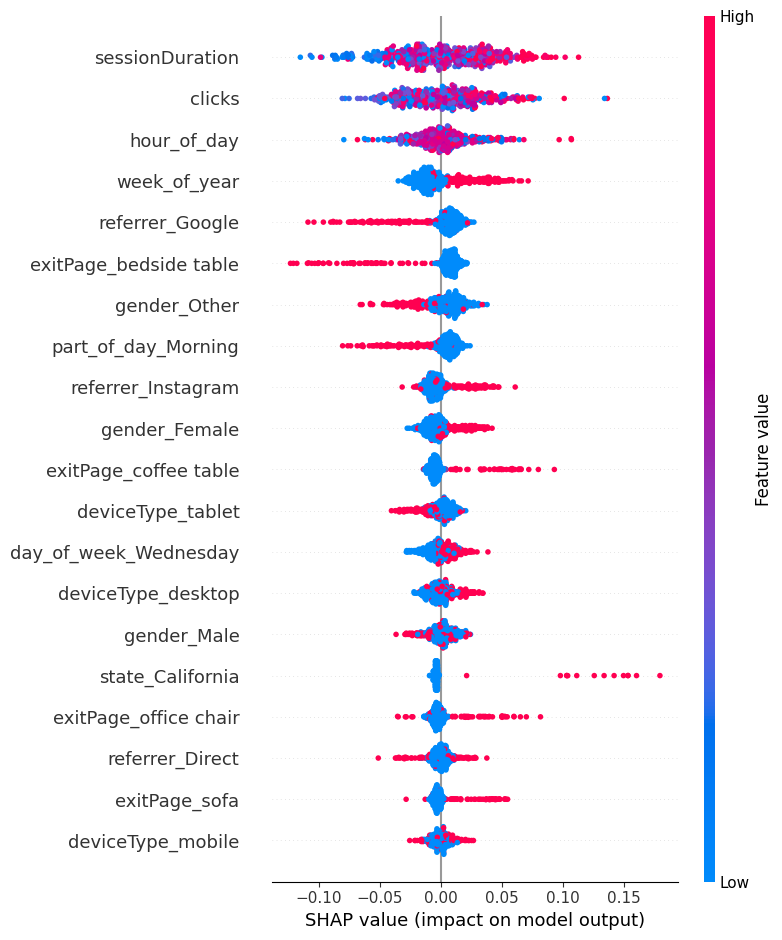

In [127]:
# Proceed to plot the SHAP values
shap.summary_plot(shap_values_pos_class, X_test_transformed_df, feature_names=all_feature_names)

## Random Forest - Differential Privacy + Explanable AI

In [136]:
# Let's select some features for the model
features = ['hour_of_day', 'day_of_week', 'is_weekend', 'month', 'week_of_year', 'part_of_day',
            'gender', 'state', 'sessionDuration', 'clicks', 'exitPage', 'referrer',
            'deviceType', 'isViewedProduct1', 'isViewedProduct2',
            'isViewedProduct3', 'isViewedProduct4', 'isViewedProduct5',
            'isViewedProduct6', 'isViewedProduct7', 'isViewedProduct8',
            'isViewedProduct9', 'isViewedProduct10']
target = 'purchaseMade'

# Preprocessing: Encode categorical variables and scale numerical variables
numerical_features = ['hour_of_day', 'month', 'week_of_year', 'sessionDuration', 'clicks']
categorical_features = ['day_of_week', 'part_of_day', 'gender', 'state', 'exitPage', 'referrer', 'deviceType']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [137]:
# Create the model pipeline
model_dp = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [138]:
from diffprivlib.mechanisms import Laplace

epsilon = 1.0  # Privacy budget, smaller values mean more privacy but less accuracy
delta = 1e-5  # The probability of the privacy guarantee not holding

laplace_mechanism = Laplace(epsilon=epsilon, sensitivity=1)

# Create a copy of the dataset to avoid altering the original data
X_train_noisy = X_train.copy()
X_test_noisy = X_test.copy()

# Add Laplace noise to the numerical features
for feature in numerical_features:
    noise = laplace_mechanism.randomise(0) * np.ones(X_train_noisy[feature].shape)
    X_train_noisy[feature] += noise


In [139]:
model_dp.fit(X_train_noisy, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['hour_of_day', 'month',
                                                   'week_of_year',
                                                   'sessionDuration',
                                                   'clicks']),
                                                 ('cat', OneHotEncoder(),
                                                  ['day_of_week', 'part_of_day',
                                                   'gender', 'state',
                                                   'exitPage', 'referrer',
                                                   'deviceType'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [140]:
y_pred = model_dp.predict(X_test_noisy)  # Use the original test data without noise for evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.72      0.79       258
        True       0.74      0.87      0.80       231

    accuracy                           0.79       489
   macro avg       0.80      0.80      0.79       489
weighted avg       0.80      0.79      0.79       489



In [141]:
# Now let's get the feature names from the preprocessor
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()
all_feature_names = numerical_features + list(ohe_feature_names)
ohe_feature_names

X_test_preprocessed = preprocessor.transform(X_test)
X_test_preprocessed.shape

print("Shape of X_test:", X_test.shape)
print("Shape of X_test_preprocessed:", X_test_preprocessed.shape)

# Initialize SHAP explainer
rf_clf = model.named_steps['classifier']
explainer = shap.TreeExplainer(rf_clf)

# Compute SHAP values for the positive class
shap_values = explainer.shap_values(X_test_transformed_df)

# Check the structure of shap_values
print(type(shap_values))
print(len(shap_values))
print(np.array(shap_values[1]).shape)


Shape of X_test: (489, 23)
Shape of X_test_preprocessed: (489, 87)
<class 'numpy.ndarray'>
489
(87, 2)


In [142]:
# Extract the SHAP values for the positive class for all samples
shap_values_pos_class = shap_values[:, :, 1]  # This slices out the positive class SHAP values for all features

# Check the shape of the extracted SHAP values for the positive class
print(shap_values_pos_class.shape)


(489, 87)


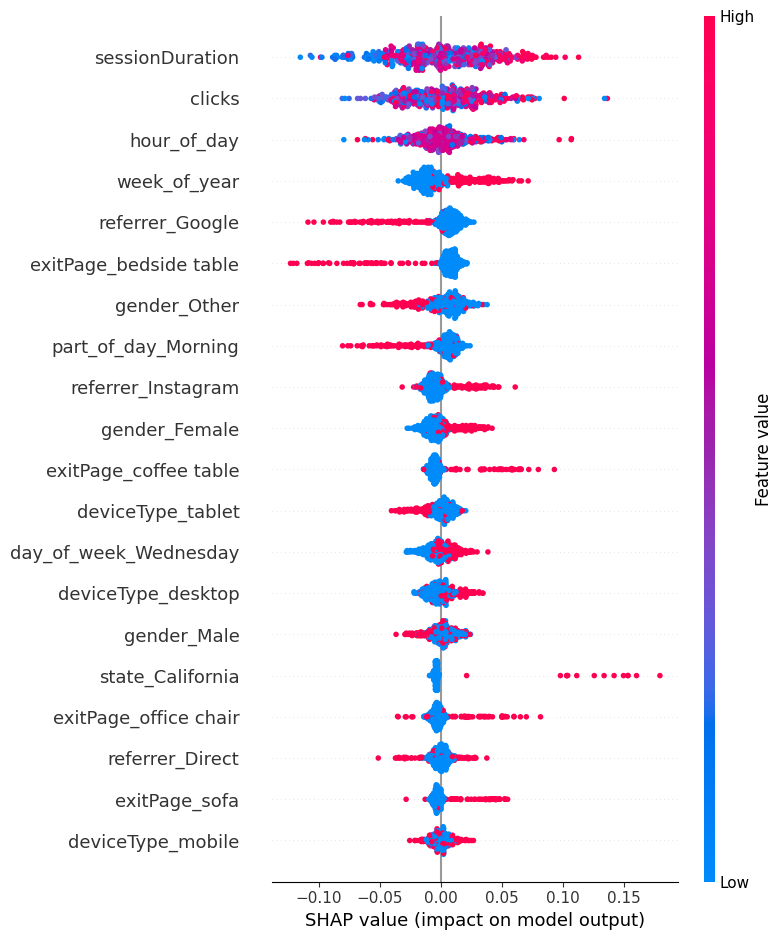

In [143]:
# Proceed to plot the SHAP values
shap.summary_plot(shap_values_pos_class, X_test_transformed_df, feature_names=all_feature_names)

## XGBOOST

In [ ]:
# pip install xgboost shap

In [144]:
df_xg = df.copy()

In [145]:
# Let's select some features for the model
features = ['hour_of_day', 'day_of_week', 'is_weekend', 'month', 'week_of_year', 'part_of_day',
            'gender', 'state', 'sessionDuration', 'clicks', 'exitPage', 'referrer',
            'deviceType', 'isViewedProduct1', 'isViewedProduct2',
            'isViewedProduct3', 'isViewedProduct4', 'isViewedProduct5',
            'isViewedProduct6', 'isViewedProduct7', 'isViewedProduct8',
            'isViewedProduct9', 'isViewedProduct10']
target = 'purchaseMade'

# Preprocessing: Encode categorical variables and scale numerical variables
numerical_features = ['hour_of_day', 'month', 'week_of_year', 'sessionDuration', 
                      'clicks']
categorical_features = ['day_of_week', 'part_of_day', 'gender', 'state', 'exitPage', 'referrer', 'deviceType']


In [146]:
# Prepare features and target
X = df_xg[features]
y = df_xg[target]

In [147]:
# Initialize ColumnTransformer to handle both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Fit and transform the preprocessor to the features
X_processed = preprocessor.fit_transform(df[features])

# Now let's get the feature names from the preprocessor
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, encoded_feature_names])  # Numerical first as per preprocessor
all_feature_names


array(['hour_of_day', 'month', 'week_of_year', 'sessionDuration',
       'clicks', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'part_of_day_Afternoon',
       'part_of_day_Evening', 'part_of_day_Morning', 'part_of_day_Night',
       'gender_Female', 'gender_Male', 'gender_Other', 'state_Alabama',
       'state_Alaska', 'state_Arizona', 'state_Arkansas',
       'state_California', 'state_Colorado', 'state_Connecticut',
       'state_Delaware', 'state_Florida', 'state_Georgia', 'state_Hawaii',
       'state_Idaho', 'state_Illinois', 'state_Indiana', 'state_Iowa',
       'state_Kansas', 'state_Kentucky', 'state_Louisiana', 'state_Maine',
       'state_Maryland', 'state_Massachusetts', 'state_Michigan',
       'state_Minnesota', 'state_Mississippi', 'state_Missouri',
       'state_Montana', 'state_Nebraska', 'state_Nevada',
       'state_New Hampshire',

In [148]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

X_train

<1303x87 sparse matrix of type '<class 'numpy.float64'>'
	with 14333 stored elements in Compressed Sparse Row format>

In [149]:
X_test

<326x87 sparse matrix of type '<class 'numpy.float64'>'
	with 3586 stored elements in Compressed Sparse Row format>

In [150]:
import scipy
# If X_test_preprocessed is a scipy sparse matrix
if scipy.sparse.issparse(X_train):
    X_train_preprocessed = X_train.toarray()  # Convert to dense numpy array

# Now create the DataFrame
X_train_transformed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)

In [151]:
# If X_test_preprocessed is a scipy sparse matrix
if scipy.sparse.issparse(X_test):
    X_test_preprocessed = X_test.toarray()  # Convert to dense numpy array

# Now create the DataFrame
X_test_transformed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

In [152]:
# Check for NaN values and the number of columns
print("Number of columns in X_train_df:", X_train_transformed_df.shape, y_train.shape)
print("Number of NaN values in X_train_df:", X_train_transformed_df.isna().sum().sum())

Number of columns in X_train_df: (1303, 87) (1303,)
Number of NaN values in X_train_df: 0


In [153]:
# Initialize and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_transformed_df, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [154]:
y_pred = model.predict(X_test_transformed_df)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.84      0.88       173
        True       0.84      0.92      0.88       153

    accuracy                           0.88       326
   macro avg       0.88      0.88      0.88       326
weighted avg       0.88      0.88      0.88       326



## SHAP (SHapley Additive exPlanations) - Explanable AI

In [155]:
# Initialize the SHAP explainer with the XGBoost model and the DataFrame
explainer = shap.Explainer(model, X_test_transformed_df)

# Calculate SHAP values for the DataFrame
shap_values = explainer(X_test_transformed_df)

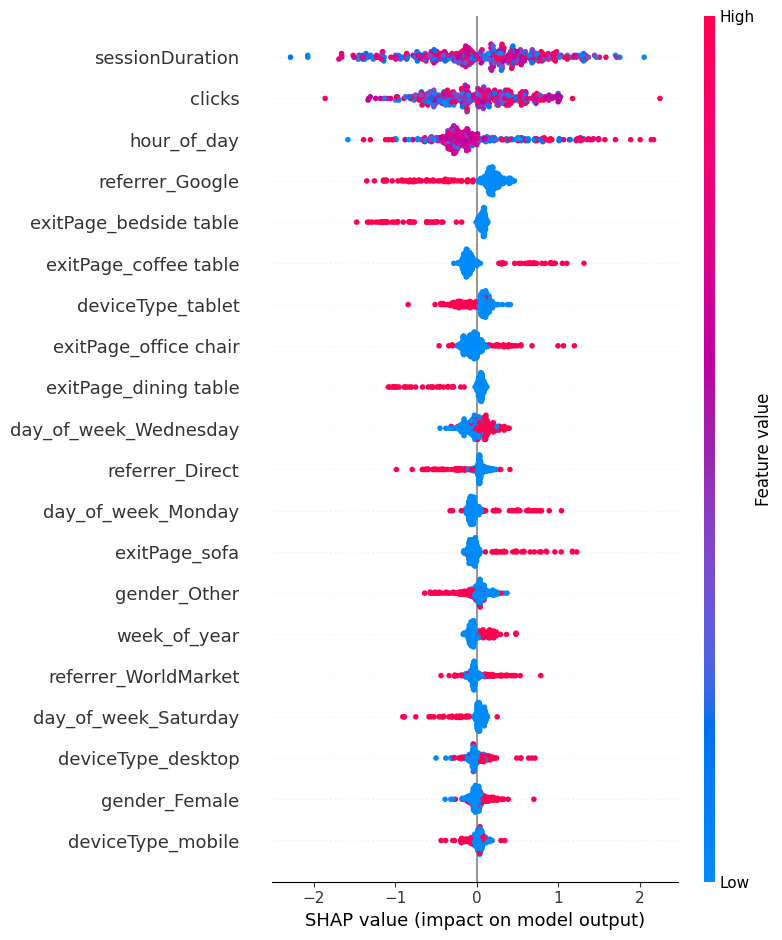

In [156]:
# Plot the SHAP values
shap.summary_plot(shap_values, X_test_transformed_df)

## XGBoost - Differential Privacy + Explanable AI

In [160]:
# Let's select some features for the model
features = ['hour_of_day', 'day_of_week', 'is_weekend', 'month', 'week_of_year', 'part_of_day',
            'gender', 'state', 'sessionDuration', 'clicks', 'exitPage', 'referrer',
            'deviceType', 'isViewedProduct1', 'isViewedProduct2',
            'isViewedProduct3', 'isViewedProduct4', 'isViewedProduct5',
            'isViewedProduct6', 'isViewedProduct7', 'isViewedProduct8',
            'isViewedProduct9', 'isViewedProduct10']
target = 'purchaseMade'
# Preprocessing: Encode categorical variables and scale numerical variables
numerical_features = ['hour_of_day', 'month', 'week_of_year', 'sessionDuration', 
                      'clicks']
categorical_features = ['day_of_week', 'part_of_day', 'gender', 'state', 'exitPage', 'referrer', 'deviceType']

# Prepare features and target
X = df_xg[features]
y = df_xg[target]


In [161]:
# Initialize ColumnTransformer to handle both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [162]:
# Fit and transform the preprocessor to the features
X_processed = preprocessor.fit_transform(df[features])


In [163]:
X_processed

<1629x87 sparse matrix of type '<class 'numpy.float64'>'
	with 17919 stored elements in Compressed Sparse Row format>

In [164]:
# Now let's get the feature names from the preprocessor
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, encoded_feature_names])  # Numerical first as per preprocessor
all_feature_names

array(['hour_of_day', 'month', 'week_of_year', 'sessionDuration',
       'clicks', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'part_of_day_Afternoon',
       'part_of_day_Evening', 'part_of_day_Morning', 'part_of_day_Night',
       'gender_Female', 'gender_Male', 'gender_Other', 'state_Alabama',
       'state_Alaska', 'state_Arizona', 'state_Arkansas',
       'state_California', 'state_Colorado', 'state_Connecticut',
       'state_Delaware', 'state_Florida', 'state_Georgia', 'state_Hawaii',
       'state_Idaho', 'state_Illinois', 'state_Indiana', 'state_Iowa',
       'state_Kansas', 'state_Kentucky', 'state_Louisiana', 'state_Maine',
       'state_Maryland', 'state_Massachusetts', 'state_Michigan',
       'state_Minnesota', 'state_Mississippi', 'state_Missouri',
       'state_Montana', 'state_Nebraska', 'state_Nevada',
       'state_New Hampshire',

In [165]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

X_train

<1303x87 sparse matrix of type '<class 'numpy.float64'>'
	with 14333 stored elements in Compressed Sparse Row format>

In [166]:
import scipy
# If X_test_preprocessed is a scipy sparse matrix
if scipy.sparse.issparse(X_train):
    X_train_proc = X_train.toarray()  # Convert to dense numpy array

# Now create the DataFrame
X_train_df = pd.DataFrame(X_train_proc, columns=all_feature_names)

# If X_test_preprocessed is a scipy sparse matrix
if scipy.sparse.issparse(X_test):
    X_test_proc = X_test.toarray()  # Convert to dense numpy array

# Now create the DataFrame
X_test_df = pd.DataFrame(X_test_proc, columns=all_feature_names)


In [167]:
X_train_noisy.shape, X_test_df.shape

((1140, 23), (326, 87))

In [168]:
from diffprivlib.mechanisms import Laplace

epsilon = 15 # Privacy budget, smaller values mean more privacy but less accuracy
delta = 1e-5  # The probability of the privacy guarantee not holding

laplace_mechanism = Laplace(epsilon=epsilon, sensitivity=1)

# Create a copy of the dataset to avoid altering the original data
X_train_noisy = X_train_df.copy()


# Add Laplace noise to the numerical features
for feature in numerical_features:
    noise = laplace_mechanism.randomise(0) * np.ones(X_train_noisy[feature].shape)
    X_train_noisy[feature] += noise


In [69]:
# Check for NaN values and the number of columns
print("Number of columns in X_train_df:", X_train_noisy.shape, y_train.shape)
print("Number of NaN values in X_train_df:", X_train_noisy.isna().sum().sum())


Number of columns in X_train_df: (1303, 87) (1303,)
Number of NaN values in X_train_df: 0


In [169]:
X_test_noisy = X_test_df.copy()
# Add Laplace noise to the numerical features
for feature in numerical_features:
    noise = laplace_mechanism.randomise(0) * np.ones(X_test_noisy[feature].shape)
    X_test_noisy[feature] += noise
# Check for NaN values and the number of columns
print("Number of columns in X_train_df:", X_test_noisy.shape, y_train.shape)
print("Number of NaN values in X_train_df:", X_test_noisy.isna().sum().sum())


Number of columns in X_train_df: (326, 87) (1303,)
Number of NaN values in X_train_df: 0


In [170]:
# Initialize and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_noisy, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [171]:
y_pred = model.predict(X_test_df)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.84      0.80      0.82       173
        True       0.79      0.82      0.81       153

    accuracy                           0.81       326
   macro avg       0.81      0.81      0.81       326
weighted avg       0.81      0.81      0.81       326



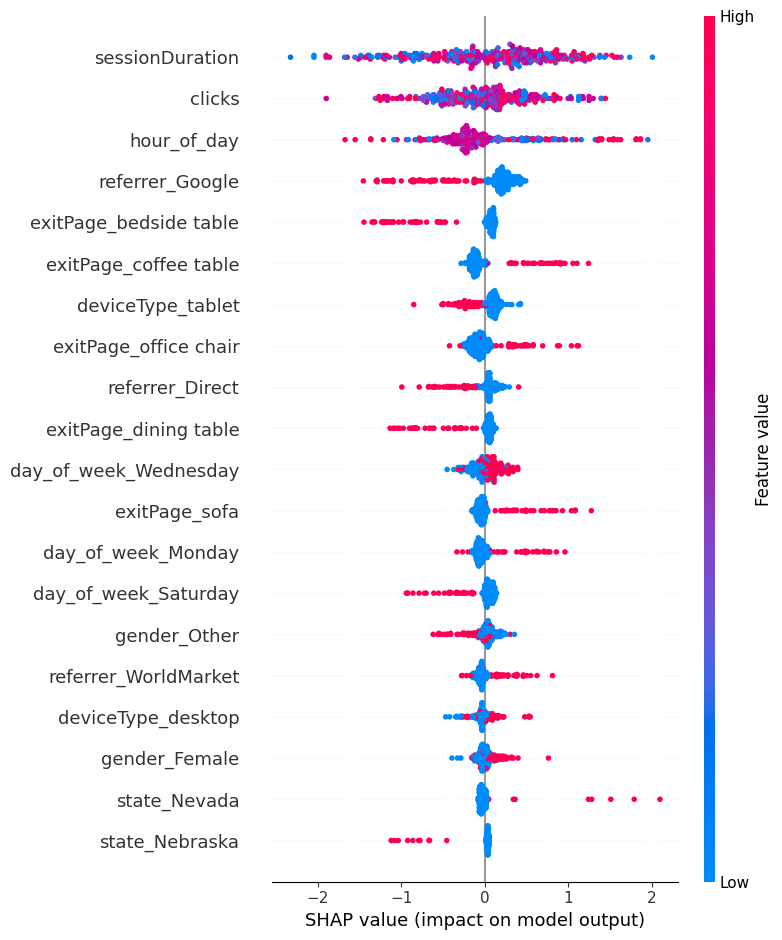

In [172]:
# Initialize the SHAP explainer with the XGBoost model and the DataFrame
explainer = shap.Explainer(model, X_test_df)

# Calculate SHAP values for the DataFrame
shap_values = explainer(X_test_df)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test_df)

# Deep Learning Model

In [42]:
# Let's select some features for the model
features = ['hour_of_day', 'day_of_week', 'is_weekend', 'month', 'week_of_year', 'part_of_day',
            'gender', 'state', 'sessionDuration', 'clicks', 'exitPage', 'referrer',
            'deviceType', 'isViewedProduct1', 'isViewedProduct2',
            'isViewedProduct3', 'isViewedProduct4', 'isViewedProduct5',
            'isViewedProduct6', 'isViewedProduct7', 'isViewedProduct8',
            'isViewedProduct9', 'isViewedProduct10']
target = 'purchaseMade'
# Preprocessing: Encode categorical variables and scale numerical variables
numerical_features = ['hour_of_day', 'month', 'week_of_year', 'sessionDuration', 
                      'clicks']
categorical_features = ['day_of_week', 'part_of_day', 'gender', 'state', 'exitPage', 'referrer', 'deviceType']

# Prepare features and target
X = df[features]
y = df[target]

# Initialize ColumnTransformer to handle both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [42]:
X.shape

(1629, 23)

In [43]:
X_processed.shape

(1629, 87)

In [44]:
# Define the model
model_org = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [40]:
model_org.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model_org.fit(X_train, y_train, epochs=100, batch_size=32)

Train on 1303 samples
Epoch 1/100
1303/1303 [==============================] - 0s 113us/sample - loss: 0.6946 - acc: 0.5119
Epoch 2/100
1303/1303 [==============================] - 0s 48us/sample - loss: 0.6610 - acc: 0.6163
Epoch 3/100
1303/1303 [==============================] - 0s 48us/sample - loss: 0.6315 - acc: 0.6731
Epoch 4/100
1303/1303 [==============================] - 0s 48us/sample - loss: 0.5947 - acc: 0.7299
Epoch 5/100
1303/1303 [==============================] - 0s 44us/sample - loss: 0.5503 - acc: 0.7736
Epoch 6/100
1303/1303 [==============================] - 0s 42us/sample - loss: 0.4991 - acc: 0.8020
Epoch 7/100
1303/1303 [==============================] - 0s 42us/sample - loss: 0.4447 - acc: 0.8296
Epoch 8/100
1303/1303 [==============================] - 0s 45us/sample - loss: 0.3905 - acc: 0.8596
Epoch 9/100
1303/1303 [==============================] - 0s 36us/sample - loss: 0.3317 - acc: 0.8895
Epoch 10/100
1303/1303 [==============================] - 0s 38us/sa

In [42]:
# Assuming 'model' is your trained model and X_test is your preprocessed test features
y_pred = model_org.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Thresholding probabilities to get binary class labels if needed

C:\Users\bhati\anaconda3\envs\bigdata\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [43]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[145  28]
 [  8 145]]


In [45]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.89


In [46]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.84      0.89       173
        True       0.84      0.95      0.89       153

    accuracy                           0.89       326
   macro avg       0.89      0.89      0.89       326
weighted avg       0.90      0.89      0.89       326



## Deep Learning - Differential Privacy + Explanable AI

In [174]:
import tensorflow_privacy
from tensorflow_privacy import DPKerasSGDOptimizer
from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy

In [175]:
df.columns

Index(['_id', 'sessionId', 'sessionTimestamp', 'userId', 'userName', 'email',
       'gender', 'state', 'ipAddress', 'sessionDuration', 'clicks', 'exitPage',
       'referrer', 'deviceType', 'paymentMethodType', 'amountSpent', 'action',
       'purchaseMade', 'isViewedProduct1', 'isViewedProduct2',
       'isViewedProduct3', 'isViewedProduct4', 'isViewedProduct5',
       'isViewedProduct6', 'isViewedProduct7', 'isViewedProduct8',
       'isViewedProduct9', 'isViewedProduct10', 'hour_of_day', 'day_of_week',
       'is_weekend', 'month', 'week_of_year', 'part_of_day'],
      dtype='object')

In [176]:
# Anonymize sensitive fields
df['userName'] = pd.util.hash_pandas_object(df['userName'])
df['email'] = pd.util.hash_pandas_object(df['email'])
df['ipAddress'] = pd.util.hash_pandas_object(df['ipAddress'])

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1629 entries, 712 to 2545
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _id                1629 non-null   object        
 1   sessionId          1629 non-null   object        
 2   sessionTimestamp   1629 non-null   datetime64[ns]
 3   userId             1629 non-null   object        
 4   userName           1629 non-null   category      
 5   email              1629 non-null   category      
 6   gender             1629 non-null   category      
 7   state              1629 non-null   category      
 8   ipAddress          1629 non-null   uint64        
 9   sessionDuration    1629 non-null   int64         
 10  clicks             1629 non-null   int64         
 11  exitPage           1629 non-null   category      
 12  referrer           1629 non-null   category      
 13  deviceType         1629 non-null   category      
 14  paymentMeth

In [180]:
# 2. Convert Data Types
df['userName'] = df['userName'].astype('category')  # Convert text data to categorical
df['email'] = df['email'].astype('category')


In [182]:
df.columns

Index(['_id', 'sessionId', 'sessionTimestamp', 'userId', 'userName', 'email',
       'gender', 'state', 'ipAddress', 'sessionDuration', 'clicks', 'exitPage',
       'referrer', 'deviceType', 'paymentMethodType', 'amountSpent', 'action',
       'purchaseMade', 'isViewedProduct1', 'isViewedProduct2',
       'isViewedProduct3', 'isViewedProduct4', 'isViewedProduct5',
       'isViewedProduct6', 'isViewedProduct7', 'isViewedProduct8',
       'isViewedProduct9', 'isViewedProduct10', 'hour_of_day', 'day_of_week',
       'is_weekend', 'month', 'week_of_year', 'part_of_day'],
      dtype='object')

In [184]:
# Let's select some features for the model
features = ['hour_of_day', 'day_of_week', 'is_weekend', 'month', 'week_of_year', 'part_of_day',
            'gender', 'state', 'sessionDuration', 'clicks', 'exitPage', 'referrer','userName',
            'deviceType', 'isViewedProduct1', 'isViewedProduct2',
            'isViewedProduct3', 'isViewedProduct4', 'isViewedProduct5',
            'isViewedProduct6', 'isViewedProduct7', 'isViewedProduct8',
            'isViewedProduct9', 'isViewedProduct10']
target = 'purchaseMade'
# Preprocessing: Encode categorical variables and scale numerical variables
numerical_features = ['hour_of_day', 'month', 'week_of_year', 'sessionDuration', 
                      'clicks']
categorical_features = ['day_of_week', 'part_of_day', 'gender', 'state', 'exitPage', 'referrer', 'deviceType','userName']

# Prepare features and target
X = df[features]
y = df[target]

# Initialize ColumnTransformer to handle both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [185]:
# Now let's get the feature names from the preprocessor
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, encoded_feature_names])  # Numerical first as per preprocessor
all_feature_names

array(['hour_of_day', 'month', 'week_of_year', ...,
       'userName_18404949272519992913', 'userName_18407674768131592684',
       'userName_18415755922428599540'], dtype=object)

In [52]:
tf.executing_eagerly()

False

In [186]:
# Differential privacy parameters
l2_norm_clip = 0.01
noise_multiplier = 0.01
num_microbatches = 1
learning_rate = 0.01


In [187]:
# Define the model
model_dp = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [106]:
tf.executing_eagerly()

True

In [188]:
batch_size = 64
epochs = 100

In [189]:
if batch_size % num_microbatches != 0:
    raise ValueError('Batch size should be an integer multiple of the number of microbatches')


In [109]:
tf.executing_eagerly()

True

In [190]:
# Compile the model with differential privacy
optimizer_new = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate
)

In [111]:
tf.executing_eagerly()

True

In [191]:
loss = tf.keras.losses.BinaryCrossentropy(
    from_logits=False, reduction=tf.losses.Reduction.NONE)  # Ensure this matches your target setup


In [113]:
tf.executing_eagerly()

True

In [192]:
model_dp.compile(optimizer=optimizer_new, loss='binary_crossentropy', metrics=['accuracy'])


In [193]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1303, 1716), (1303,), (326, 1716), (326,))

In [194]:
X_train

<1303x1716 sparse matrix of type '<class 'numpy.float64'>'
	with 15636 stored elements in Compressed Sparse Row format>

In [195]:
import scipy
# If X_test_preprocessed is a scipy sparse matrix
if scipy.sparse.issparse(X_train):
    X_train_proc = X_train.toarray()  # Convert to dense numpy array

# Now create the DataFrame
X_train_df = pd.DataFrame(X_train_proc, columns=all_feature_names)

# If X_test_preprocessed is a scipy sparse matrix
if scipy.sparse.issparse(X_test):
    X_test_proc = X_test.toarray()  # Convert to dense numpy array

# Now create the DataFrame
X_test_df = pd.DataFrame(X_test_proc, columns=all_feature_names)


In [196]:
print(X_train_df.shape, X_test_df.shape)

X_train_df

(1303, 1716) (326, 1716)


,hour_of_day,month,week_of_year,sessionDuration,clicks,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,...,userName_18256210356043837359,userName_18258739090253584200,userName_18260481280116457220,userName_18260619580544161104,userName_18291439885055655452,userName_18294389067610839679,userName_18296111479698527154,userName_18404949272519992913,userName_18407674768131592684,userName_18415755922428599540
0,0.414954,0.0,-0.675103,-0.664840,0.614962,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.279585,0.0,1.481255,0.160653,-1.711401,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.414954,0.0,-0.675103,-1.548466,-0.206107,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.414954,0.0,-0.675103,-0.664840,-0.958754,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.495030,0.0,-0.675103,-1.031079,1.504454,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,-1.842300,0.0,1.481255,0.939640,1.230764,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299,-0.626855,0.0,1.481255,-1.699613,0.478117,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1300,0.414954,0.0,-0.675103,1.253560,0.751807,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1301,0.414954,0.0,-0.675103,-0.066066,1.572876,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
# Train the model
model_dp.fit(X_train_df, y_train,
          epochs=epochs,
          validation_data=(X_test_df, y_test),
          batch_size=32)

Train on 1303 samples, validate on 326 samples
Epoch 1/100
1303/1303 [==============================] - 0s 260us/sample - loss: 0.6906 - acc: 0.5303 - val_loss: 0.6943 - val_acc: 0.4847
Epoch 2/100
1024/1303 [======================>.......] - ETA: 0s - loss: 0.6916 - acc: 0.5205

c:\Users\bhati\anaconda3\envs\bigdata\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1303/1303 [==============================] - 0s 117us/sample - loss: 0.6906 - acc: 0.5303 - val_loss: 0.6943 - val_acc: 0.4877
Epoch 3/100
1303/1303 [==============================] - 0s 97us/sample - loss: 0.6905 - acc: 0.5318 - val_loss: 0.6943 - val_acc: 0.4877
Epoch 4/100
1303/1303 [==============================] - 0s 85us/sample - loss: 0.6905 - acc: 0.5303 - val_loss: 0.6942 - val_acc: 0.4877
Epoch 5/100
1303/1303 [==============================] - 0s 85us/sample - loss: 0.6904 - acc: 0.5303 - val_loss: 0.6942 - val_acc: 0.4877
Epoch 6/100
1303/1303 [==============================] - 0s 96us/sample - loss: 0.6904 - acc: 0.5303 - val_loss: 0.6941 - val_acc: 0.4908
Epoch 7/100
1303/1303 [==============================] - 0s 98us/sample - loss: 0.6903 - acc: 0.5303 - val_loss: 0.6941 - val_acc: 0.4908
Epoch 8/100
1303/1303 [==============================] - 0s 95us/sample - loss: 0.6903 - acc: 0.5311 - val_loss: 0.6941 - val_acc: 0.4877
Epoch 9/100
1303/1303 [======================

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [198]:
# Assuming 'model' is your trained model and X_test is your preprocessed test features
y_pred_dp = model_dp.predict(X_test_df)
y_pred_dp = (y_pred_dp > 0.5).astype(int)  # Thresholding probabilities to get binary class labels if needed

c:\Users\bhati\anaconda3\envs\bigdata\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [199]:
accuracy = accuracy_score(y_test, y_pred_dp)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.51


In [200]:
conf_matrix = confusion_matrix(y_test, y_pred_dp)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 36 137]
 [ 23 130]]


In [201]:
f1 = f1_score(y_test, y_pred_dp)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.62


In [202]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dp))

Classification Report:
              precision    recall  f1-score   support

       False       0.61      0.21      0.31       173
        True       0.49      0.85      0.62       153

    accuracy                           0.51       326
   macro avg       0.55      0.53      0.46       326
weighted avg       0.55      0.51      0.46       326



In [203]:
# Assuming you've already defined your training parameters like epochs, batch_size, etc.
epsilon, optimal_order = compute_dp_sgd_privacy(
    n=X_train_df.shape[0],
    batch_size=64,  # Ensure this matches your actual batch size
    noise_multiplier=1.3,
    epochs=100,
    delta=1e-5
)


In [204]:
print(f"Privacy budget (epsilon): {epsilon}, at optimal RDP order: {optimal_order}")

Privacy budget (epsilon): 11.028244364573894, at optimal RDP order: 3.0


## Explanable AI using SHAP

In [205]:
X_test_df

,hour_of_day,month,week_of_year,sessionDuration,clicks,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,...,userName_18256210356043837359,userName_18258739090253584200,userName_18260481280116457220,userName_18260619580544161104,userName_18291439885055655452,userName_18294389067610839679,userName_18296111479698527154,userName_18404949272519992913,userName_18407674768131592684,userName_18415755922428599540
0,0.414954,0.0,-0.675103,0.881507,-1.642979,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.414954,0.0,-0.675103,1.073347,0.272850,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.804034,0.0,1.481255,-0.362546,0.683384,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.495030,0.0,1.481255,-0.013746,-1.164021,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.109494,0.0,1.481255,1.247746,0.409695,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,-2.189570,0.0,-0.675103,-0.037000,0.820229,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
322,0.414954,0.0,-0.675103,-1.199666,-1.506134,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323,1.630399,0.0,-0.675103,-1.624039,0.683384,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
324,1.283129,0.0,1.481255,1.044280,0.478117,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
X_train_np = X_train_df.to_numpy()

# Create a DeepExplainer instance
explainer = shap.DeepExplainer(model_dp, X_train_np)

shap_values = explainer.shap_values(X_train_np)

c:\Users\bhati\anaconda3\envs\bigdata\lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [208]:
X_train_df.head(1)

,hour_of_day,month,week_of_year,sessionDuration,clicks,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,...,userName_18256210356043837359,userName_18258739090253584200,userName_18260481280116457220,userName_18260619580544161104,userName_18291439885055655452,userName_18294389067610839679,userName_18296111479698527154,userName_18404949272519992913,userName_18407674768131592684,userName_18415755922428599540
0,0.414954,0.0,-0.675103,-0.66484,0.614962,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
#print(shap_values.shape)
#Reshape SHAP values to remove the extraneous third dimension if it is not necessary
shap_values_reshaped = shap_values.squeeze(axis=-1)  # This changes shape from (1303, 87, 1) to (1303, 87)
#print(shap_values_reshaped.shape)

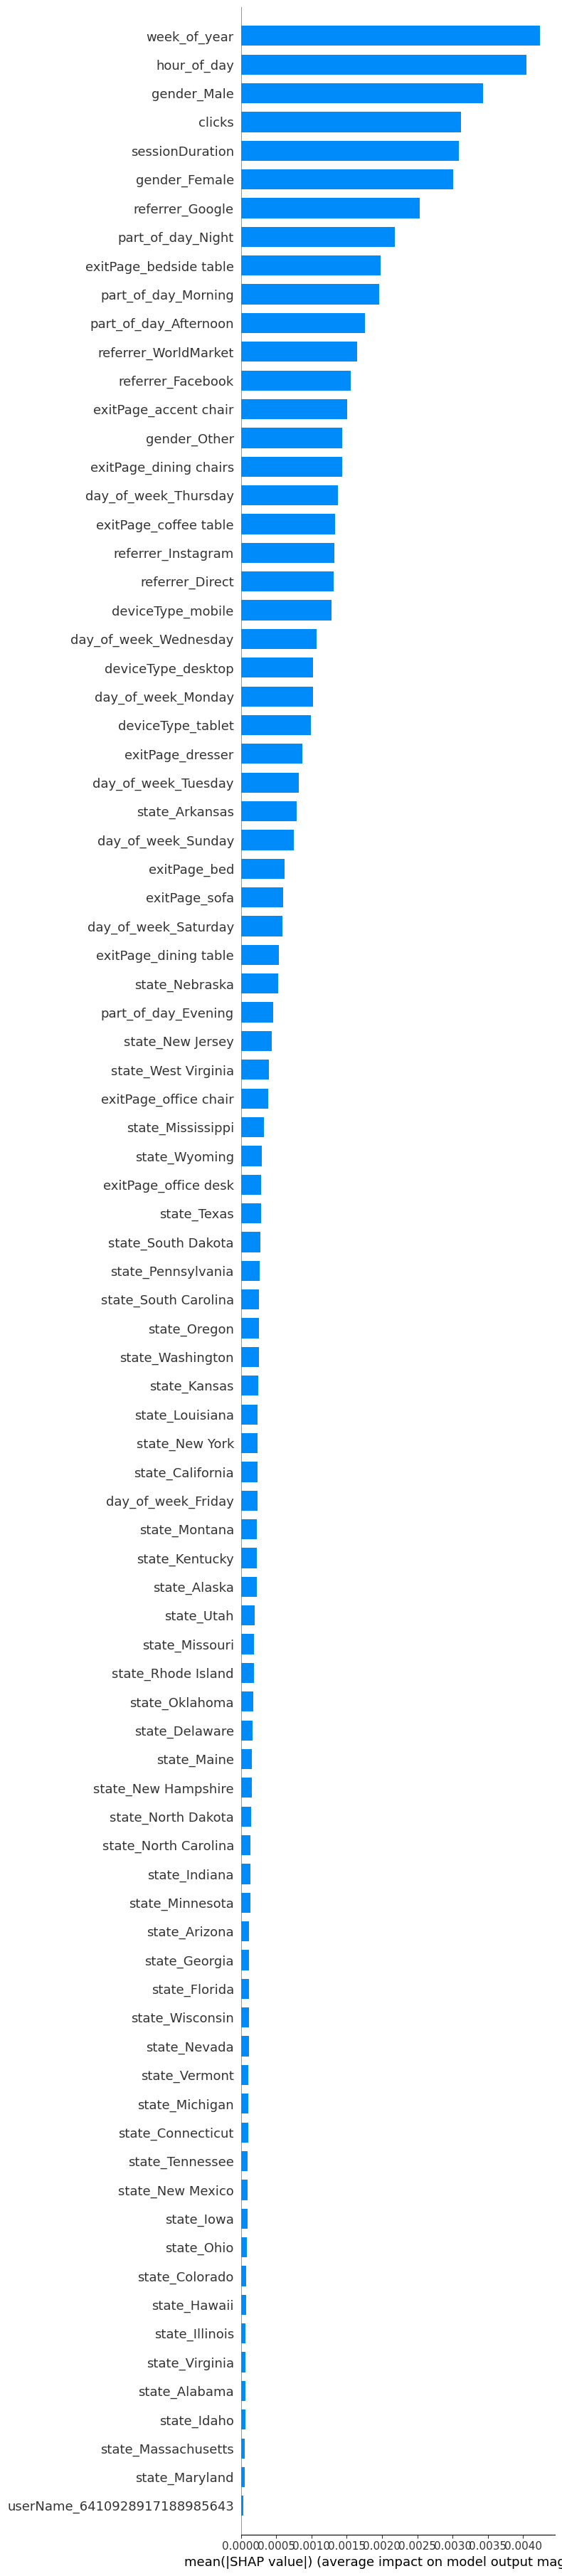

In [210]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))  # Adjust the size as needed
shap.summary_plot(shap_values_reshaped, X_train_df, plot_type="bar", max_display=87)
plt.show()


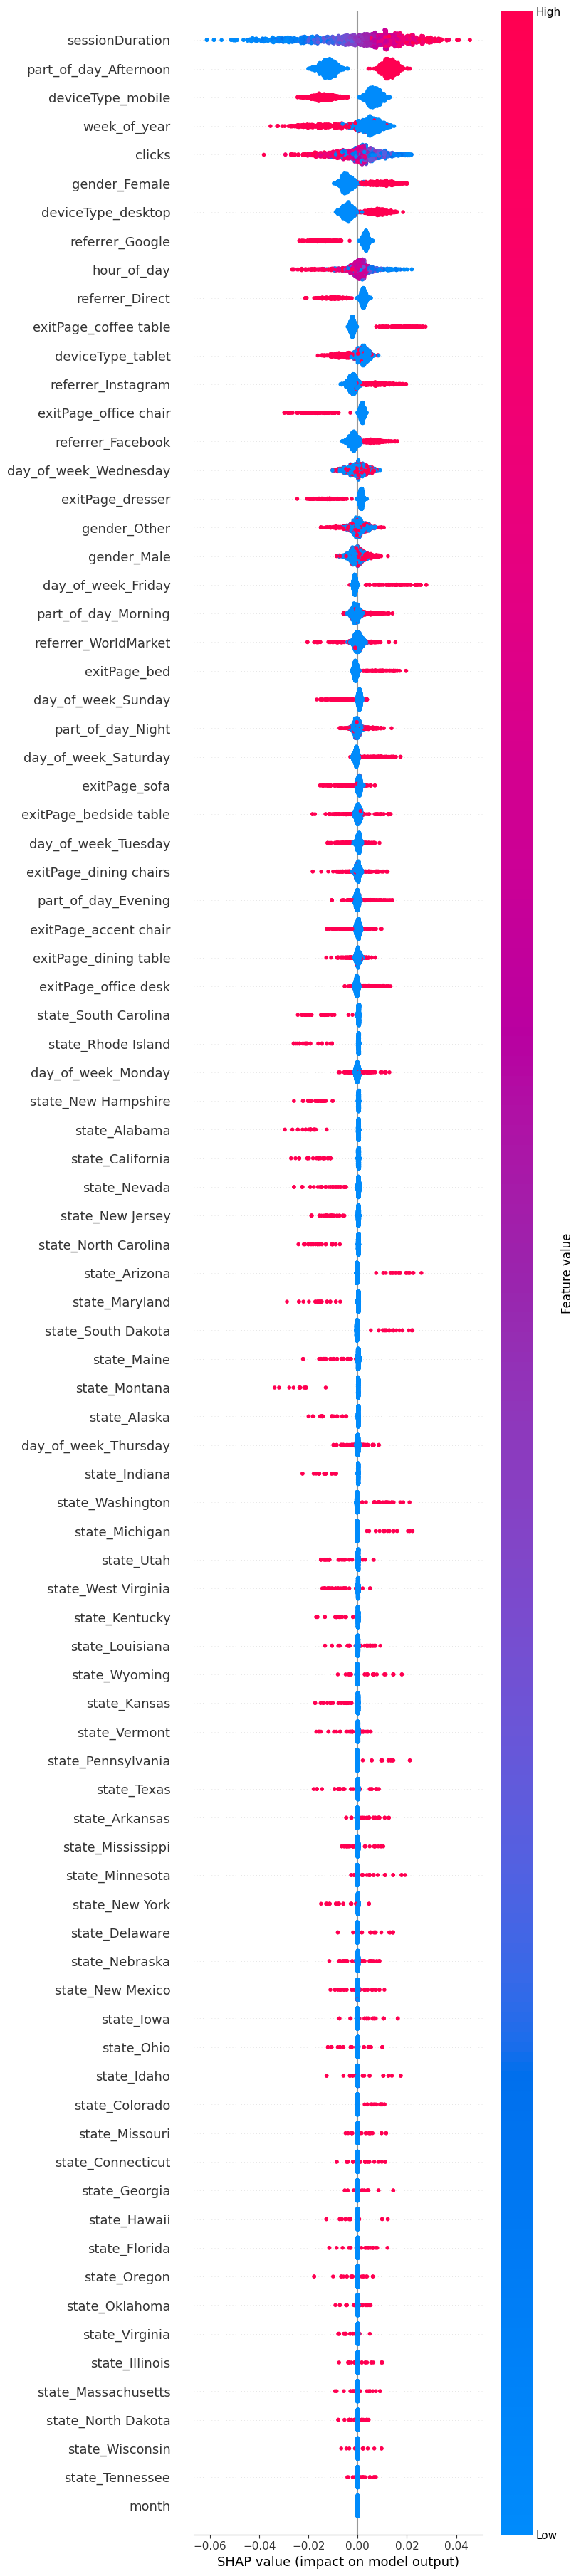

In [98]:
## This is generated when we dont use Personal identifiable information
shap.summary_plot(shap_values_reshaped, X_train_df, plot_type="dot", max_display=87)